# Importing

In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# Load csv file

In [111]:
df = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv")

# 1- Data Understanding

In [112]:
df.shape

(11914, 16)

In [113]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [114]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [115]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [116]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


# 2-Data Preparation

In [117]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
  df[col] = df[col].str.lower().str.replace(' ', '_')

In [118]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [119]:
df = df.rename(columns={'msrp':'price'})

In [120]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'price'],
      dtype='object')

In [121]:
df.loc[df.duplicated()]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,price
14,bmw,1_series,2013,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,19,3916,31500
18,audi,100,1992,regular_unleaded,172.0,6.0,manual,front_wheel_drive,4.0,luxury,midsize,sedan,24,17,3105,2000
20,audi,100,1992,regular_unleaded,172.0,6.0,manual,front_wheel_drive,4.0,luxury,midsize,sedan,24,17,3105,2000
24,audi,100,1993,regular_unleaded,172.0,6.0,manual,front_wheel_drive,4.0,luxury,midsize,sedan,24,17,3105,2000
25,audi,100,1993,regular_unleaded,172.0,6.0,manual,front_wheel_drive,4.0,luxury,midsize,sedan,24,17,3105,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11481,suzuki,x-90,1998,regular_unleaded,95.0,4.0,manual,four_wheel_drive,2.0,NaN,compact,2dr_suv,26,22,481,2000
11603,volvo,xc60,2017,regular_unleaded,302.0,4.0,automatic,all_wheel_drive,4.0,"crossover,luxury,performance",midsize,4dr_suv,29,20,870,46350
11604,volvo,xc60,2017,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,"crossover,luxury",midsize,4dr_suv,30,23,870,40950
11708,suzuki,xl7,2008,regular_unleaded,252.0,6.0,automatic,all_wheel_drive,4.0,crossover,midsize,4dr_suv,22,15,481,29149


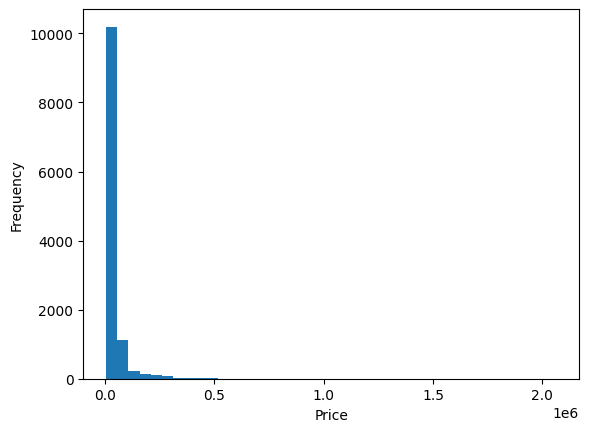

In [122]:
# plot price
plt.hist(df.price, bins=40)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.show()

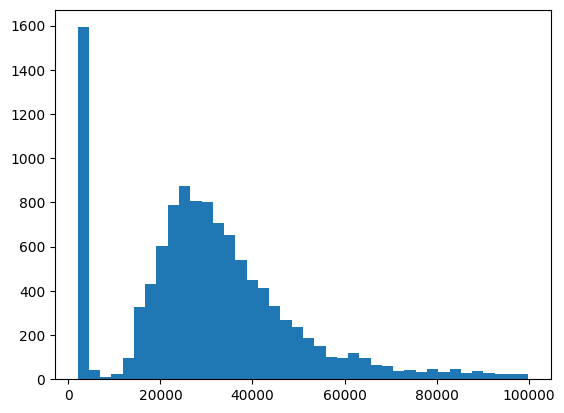

In [123]:
# plot price under 100000
plt.hist(df.price[df.price < 100000], bins=40)
plt.show()

In [124]:
# log transformation to remove the long tail from price
log_price = np.log1p(df.price)
df['log_price'] = log_price

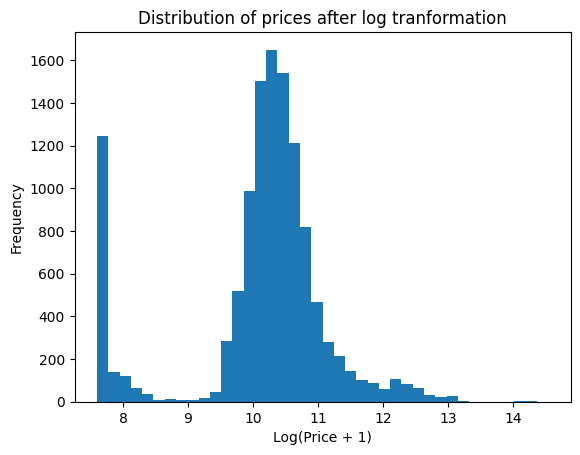

In [125]:
plt.hist(df.log_price, bins=40)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of prices after log tranformation')
plt.show()

In [126]:
df.isna().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
price                   0
log_price               0
dtype: int64

<ipython-input-127-8d3a9cce6f41>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  _=sns.heatmap(df.corr(), annot = True)


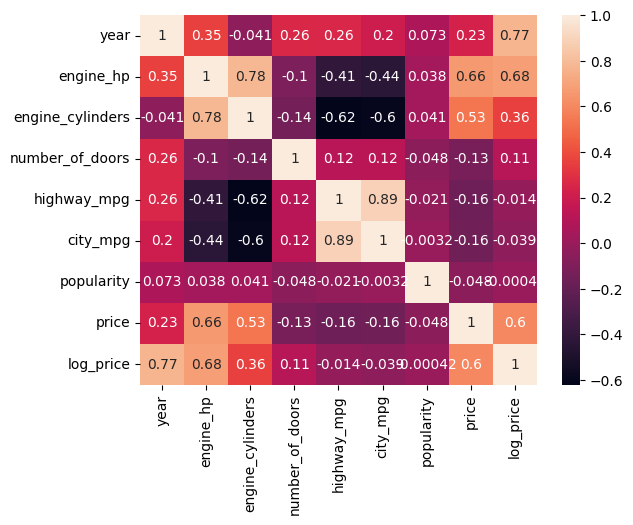

In [127]:
_=sns.heatmap(df.corr(), annot = True)

In [128]:
string_columns

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [129]:
# one-hot encoding using pandas
df = pd.get_dummies(df, columns=string_columns)

In [130]:
df.head()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,price,log_price,make_acura,...,vehicle_style_convertible,vehicle_style_convertible_suv,vehicle_style_coupe,vehicle_style_crew_cab_pickup,vehicle_style_extended_cab_pickup,vehicle_style_passenger_minivan,vehicle_style_passenger_van,vehicle_style_regular_cab_pickup,vehicle_style_sedan,vehicle_style_wagon
0,2011,335.0,6.0,2.0,26,19,3916,46135,10.739349,0,...,0,0,1,0,0,0,0,0,0,0
1,2011,300.0,6.0,2.0,28,19,3916,40650,10.612779,0,...,1,0,0,0,0,0,0,0,0,0
2,2011,300.0,6.0,2.0,28,20,3916,36350,10.500977,0,...,0,0,1,0,0,0,0,0,0,0
3,2011,230.0,6.0,2.0,28,18,3916,29450,10.290483,0,...,0,0,1,0,0,0,0,0,0,0
4,2011,230.0,6.0,2.0,28,18,3916,34500,10.448744,0,...,1,0,0,0,0,0,0,0,0,0


In [131]:
df.isna().sum()

year                                 0
engine_hp                           69
engine_cylinders                    30
number_of_doors                      6
highway_mpg                          0
                                    ..
vehicle_style_passenger_minivan      0
vehicle_style_passenger_van          0
vehicle_style_regular_cab_pickup     0
vehicle_style_sedan                  0
vehicle_style_wagon                  0
Length: 1080, dtype: int64

In [132]:
# Fill NaN values with mean of its column
df.fillna(df.mean(), inplace=True)

In [133]:
df.isna().sum()

year                                0
engine_hp                           0
engine_cylinders                    0
number_of_doors                     0
highway_mpg                         0
                                   ..
vehicle_style_passenger_minivan     0
vehicle_style_passenger_van         0
vehicle_style_regular_cab_pickup    0
vehicle_style_sedan                 0
vehicle_style_wagon                 0
Length: 1080, dtype: int64

In [134]:
# Remove price column
del df['price']

In [135]:
df.head()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,log_price,make_acura,make_alfa_romeo,...,vehicle_style_convertible,vehicle_style_convertible_suv,vehicle_style_coupe,vehicle_style_crew_cab_pickup,vehicle_style_extended_cab_pickup,vehicle_style_passenger_minivan,vehicle_style_passenger_van,vehicle_style_regular_cab_pickup,vehicle_style_sedan,vehicle_style_wagon
0,2011,335.0,6.0,2.0,26,19,3916,10.739349,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2011,300.0,6.0,2.0,28,19,3916,10.612779,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2011,300.0,6.0,2.0,28,20,3916,10.500977,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2011,230.0,6.0,2.0,28,18,3916,10.290483,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2011,230.0,6.0,2.0,28,18,3916,10.448744,0,0,...,1,0,0,0,0,0,0,0,0,0


# Regression

In [136]:
# Sklearn for regression model
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [137]:
# get X, y
X = df.drop('log_price', axis=1)
y = df['log_price']

In [138]:
# Create an instance of StandardScaler
scaler = StandardScaler()
# Fit the scaler
X_scaled = scaler.fit_transform(X)

# split data to 80% 20%
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.3, random_state=42)

In [139]:
# train model
model = Ridge(alpha=.1)
model.fit(X_train, y_train)

# make prediction on test set
y_pred = model.predict(X_test)

In [140]:
# Inverse log transform to get the actual prices
predicted_prices = np.expm1(y_pred)
actual_prices = np.expm1(y_test)

In [141]:
# Compute MSE and accuracy
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MSE: ', mse*100)
print('Accuracy: ', r2*100)

MSE:  4.234821165128311
Accuracy:  96.5521452830265


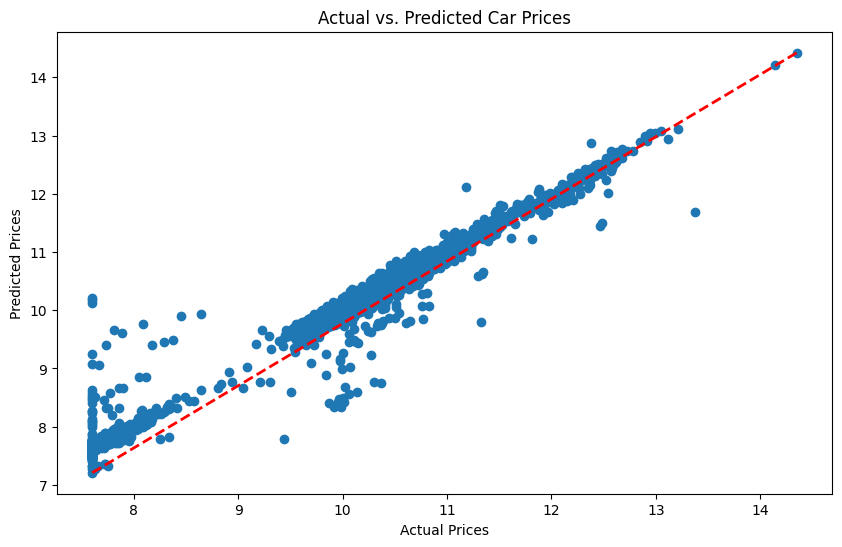

In [142]:
# Plotting the linear line of the model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], color='red', linestyle='--', linewidth=2)
plt.title('Actual vs. Predicted Car Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

In [143]:
# Prediting for new car
new_car_features = {
      'city_mpg': 18,
      'driven_wheels': 'all_wheel_drive',
       'engine_cylinders': 6.0,
       'engine_fuel_type': 'regular_unleaded',
       'engine_hp': 268.0,
       'highway_mpg': 25,
       'make': 'toyota',
       'market_category': 'crossover,performance',
       'model': 'venza',
      'number_of_doors': 4.0,
       'popularity': 2031,
      'transmission_type': 'automatic',
       'vehicle_size': 'midsize',
       'vehicle_style': 'wagon',
       'year': 2013
}

# Convert new car features to a DataFrame
new_car_df = pd.DataFrame([new_car_features])

# Get dummy variables for categorical columns
new_car_df = pd.get_dummies(new_car_df, columns=string_columns)

# Add missing columns with default values (0)
missing_cols = list(set(X.columns) - set(new_car_df.columns))
missing_df = pd.DataFrame(0, index=new_car_df.index, columns=missing_cols)

# Concatenate the new_car_df and missing_df DataFrames
new_car_df = pd.concat([new_car_df, missing_df], axis=1)

# Ensure column order matches the order during training
new_car_df = new_car_df[X.columns]

# Scale the features using the previously fitted scaler
new_car_scaled = scaler.transform(new_car_df)

# Predict the log price
new_car_log_price = model.predict(new_car_scaled)

# Inverse log transform to get the actual predicted price
predicted_price = np.expm1(new_car_log_price)

print(f"Predicted Price for the New Car: { predicted_price[0]:.2f}")


Predicted Price for the New Car: 35953.31
